In [ ]:
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing

In [ ]:
import sklearn
from sklearn import datasets 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import platform
import os
%matplotlib inline

#show the versions of the libraries that are currently in use
message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.23.1
Numpy version=1.18.5
Pandas version=1.0.5
Seaborn version=0.10.1
Python version=3.8.3


In [ ]:
#Import train data 
#os.chdir('D:\GRAB - Safety')

train_df = pd.read_csv("Safety_DataSet_Aggregated.csv")
train_df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0


# Exploratory Data Analysis

In [ ]:
#Showing all the information about the dataset

msg="Information of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(train_df.info())
print()

msg="Columns in the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(train_df.columns)
print()

msg="Shape of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(train_df.shape)
print()

msg="Descriptive statistical summary of the train dataset is shown below: "
print("*"*len(msg))
print(msg)
print("*"*len(msg))
train_df.describe()

********************************
Information of the Train Dataset
********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16154418 entries, 0 to 16154417
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   bookingID       int64  
 1   Accuracy        float64
 2   Bearing         float64
 3   acceleration_x  float64
 4   acceleration_y  float64
 5   acceleration_z  float64
 6   gyro_x          float64
 7   gyro_y          float64
 8   gyro_z          float64
 9   second          float64
 10  Speed           float64
 11  label           int64  
dtypes: float64(10), int64(2)
memory usage: 1.4 GB
None

****************************
Columns in the Train Dataset
****************************
Index(['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed',
       'label'],
      dtype='object')

**************************
Shape of the Tra

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07,1.615442e+07
mean,8.185295e+11,1.160744e+01,1.689771e+02,6.931060e-02,4.464359e+00,8.927299e-01,-1.713431e-03,2.663392e-04,-2.538211e-04,3.799905e+03,9.006626e+00,3.057288e-01
std,4.953377e+11,8.686924e+01,1.072962e+02,1.423701e+00,8.132821e+00,3.252890e+00,1.445047e-01,3.398832e-01,1.480109e-01,1.435848e+06,8.106292e+00,4.607154e-01
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00,0.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.078247e-01,-2.113992e+00,-9.337672e-01,-2.678341e-02,-2.994671e-02,-1.875904e-02,2.410000e+02,1.020000e+00,0.000000e+00
50%,8.074539e+11,4.255000e+00,1.689621e+02,6.159973e-02,9.081207e+00,7.740933e-01,-6.442187e-04,2.620612e-04,-3.490659e-05,5.200000e+02,7.530000e+00,0.000000e+00
75%,1.254130e+12,8.000000e+00,2.630000e+02,6.353790e-01,9.709685e+00,2.749072e+00,2.330015e-02,3.141785e-02,1.823433e-02,8.630000e+02,1.548000e+01,1.000000e+00
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02,1.000000e+00


In [ ]:
#List out the missing values 

df_train.isnull().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64

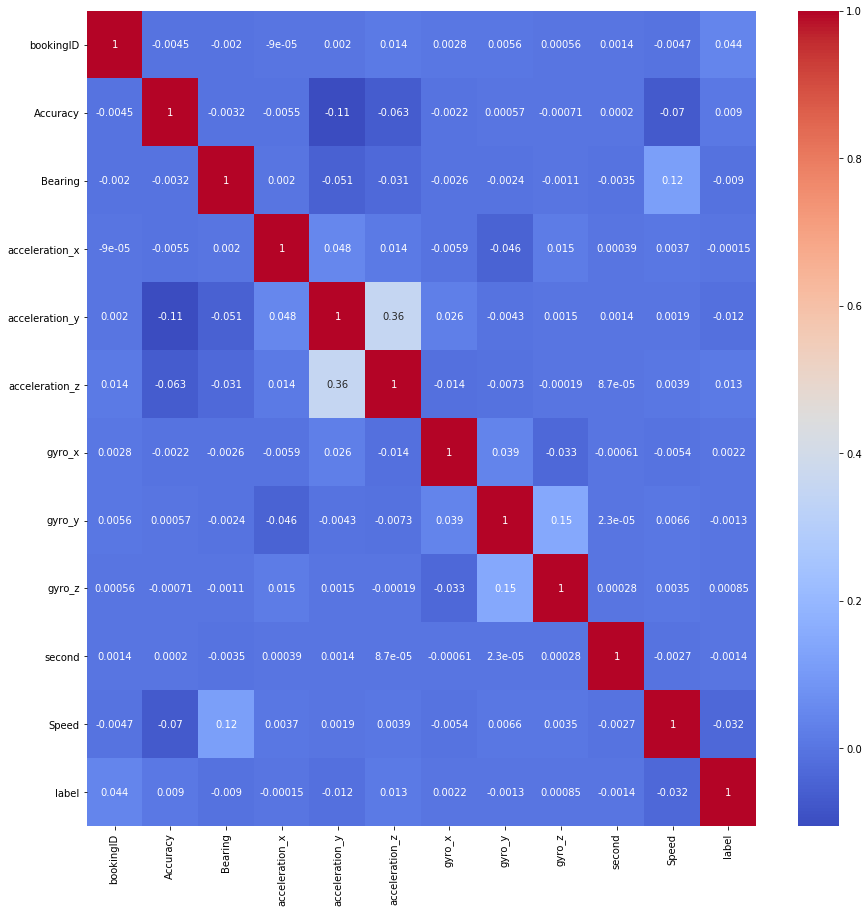

In [ ]:
#heatmap (correlation analysis) -overview 
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

In [ ]:
# Seperated the columns into catergorical variables and numerical variables

num_vars=list(df_train.columns[df_train.dtypes != "object"])
cat_vars=list(df_train.columns[df_train.dtypes == "object"])
print("Categorical Variables: ",cat_vars)
print("Numerical Variables: ",num_vars)

Categorical Variables:  []
Numerical Variables:  ['bookingID', 'Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed', 'label']


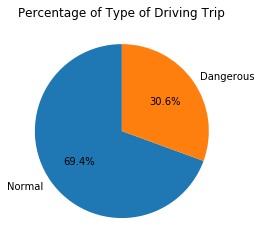

In [ ]:
# Type of Driving Trip

train_s=train_df['label'].value_counts()[[0]].sum()
train_d=train_df['label'].value_counts()[[1]].sum()

train_l=[train_s,train_d]
train_tag=['Normal','Dangerous']

plt.pie(train_l,labels=train_tag,startangle=90,autopct='%.1f%%')
plt.title('Percentage of Type of Driving Trip')

plt.show()

Text(0.5, 1.0, 'Speed of the Vechicle')

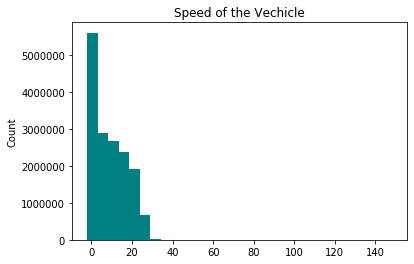

In [ ]:
#Show the Distrubution of the speed 

plt.hist(df_train['Speed'], bins=29,color='teal')
plt.ylabel('Count')
plt.title('Speed of the Vechicle')

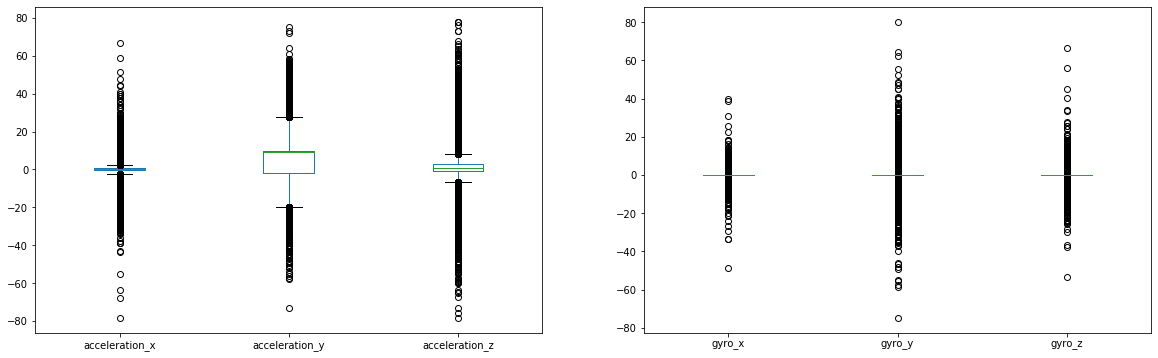

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
box0 = df_train[['acceleration_x','acceleration_y','acceleration_z']]
box1 = df_train[['gyro_x','gyro_y','gyro_z']]

box0.plot(kind='box', figsize=(20, 6), ax=ax0) # add to subplot 1
box1.plot(kind='box', figsize=(20, 6), ax=ax1) # add to subplot 2

plt.show()

# Data Preperation

## Data Cleansing

In [ ]:
# remove seconds more than 86400 seconds(24hr)

overloaded_seconds = train_df.loc[train_df['second'] > 86400].index
train_df.drop(overloaded_seconds, inplace = True)

In [ ]:
# remove speed less than 0

under_speed = train_df.loc[train_df['Speed'] < 0].index
train_df.drop(under_speed, inplace = True)

## Feature Engineering

In [ ]:
# speed > 25m/s (singapore's speed limit 90km/hr) 

train_df['speed_limit'] = train_df['Speed']
train_df.loc[train_df['Speed'] > 25, 'speed_limit'] = 'speeding'
train_df.loc[train_df['Speed'] < 25, 'speed_limit'] = 'under control'

train_df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,speed_limit
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0,under control
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0,under control
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0,under control
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0,under control
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0,under control


In [ ]:
#Distance
train_df['distance']=train_df['Speed']*train_df['second']
train_df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label,speed_limit,distance
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,0,under control,0.000000
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,0,under control,0.228454
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,0,under control,0.456909
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,0,under control,0.685363
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,0,under control,0.913818


In [ ]:
# Speed 

train_df['speed_x'] = train_df['acceleration_x']*train_df['second']
train_df['speed_y'] = train_df['acceleration_y']*train_df['second']
train_df['speed_z'] = train_df['acceleration_z']*train_df['second']

In [ ]:
# Radian 
train_df['rad_x']=train_df['gyro_x']*train_df['second']
train_df['rad_y']=train_df['gyro_y']*train_df['second']
train_df['rad_z']=train_df['gyro_z']*train_df['second']

In [ ]:
# gyro 
# interaction variable with all the combination of the feature 'Gyro' based on 
#the vector theorem

train_df['gyro_xy']=np.sqrt(train_df['gyro_x']**2+train_df['gyro_y']**2)
train_df['gyro_xz']=np.sqrt(train_df['gyro_x']**2+train_df['gyro_z']**2)
train_df['gyro_yz']=np.sqrt(train_df['gyro_z']**2+train_df['gyro_y']**2)
train_df['gyro_xyz']=np.sqrt(train_df['gyro_x']**2+train_df['gyro_y']**2+train_df['gyro_z']**2)

In [ ]:
#Transform the accelerometer data
#Acceleration

train_df['acc_xy']=np.sqrt(train_df['acceleration_x']**2+train_df['acceleration_y']**2)
train_df['acc_xz']=np.sqrt(train_df['acceleration_x']**2+train_df['acceleration_z']**2)
train_df['acc_yz']=np.sqrt(train_df['acceleration_z']**2+train_df['acceleration_y']**2)
train_df['acc_xyz']=np.sqrt(train_df['acceleration_x']**2+train_df['acceleration_y']**2+train_df['acceleration_z']**2)

In [ ]:
train_df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,...,rad_y,rad_z,gyro_xy,gyro_xz,gyro_yz,gyro_xyz,acc_xy,acc_xz,acc_yz,acc_xyz
0,0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,...,-0.000000,0.000000,0.095433,0.072574,0.117672,0.118788,9.975067,2.174748,10.143612,10.176551
1,0,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,...,-0.078874,0.043187,0.091863,0.063897,0.089924,0.101508,9.850755,2.110871,10.044702,10.059553
2,0,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,...,-0.065304,0.030780,0.043648,0.032800,0.036097,0.046282,9.426490,2.091389,9.349350,9.503762
3,0,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,...,0.015146,-0.077258,0.022975,0.034140,0.026243,0.034511,9.652562,2.338865,9.727700,9.830320
4,0,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,...,-0.184822,0.087606,0.048367,0.026155,0.051133,0.053095,9.871672,1.502745,9.949502,9.967466


### Data Cleansing

In [ ]:
#remove unwanted columns 
train_df = train_df.drop(['bookingID'],axis=1)
train_df.head()


,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,...,rad_y,rad_z,gyro_xy,gyro_xz,gyro_yz,gyro_xyz,acc_xy,acc_xz,acc_yz,acc_xyz
0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,...,-0.000000,0.000000,0.095433,0.072574,0.117672,0.118788,9.975067,2.174748,10.143612,10.176551
1,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,...,-0.078874,0.043187,0.091863,0.063897,0.089924,0.101508,9.850755,2.110871,10.044702,10.059553
2,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,...,-0.065304,0.030780,0.043648,0.032800,0.036097,0.046282,9.426490,2.091389,9.349350,9.503762
3,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,...,0.015146,-0.077258,0.022975,0.034140,0.026243,0.034511,9.652562,2.338865,9.727700,9.830320
4,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,...,-0.184822,0.087606,0.048367,0.026155,0.051133,0.053095,9.871672,1.502745,9.949502,9.967466


In [ ]:
# Show categorical varibles and numeric variables

tnum_vars=list(train_df.columns[train_df.dtypes != "object"])
tcat_vars=list(train_df.columns[train_df.dtypes == "object"])
print("Categorical Variables: ",tcat_vars)
print("Numerical Variables: ",tnum_vars)

Categorical Variables:  ['speed_limit']
Numerical Variables:  ['Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'second', 'Speed', 'label', 'distance', 'speed_x', 'speed_y', 'speed_z', 'rad_x', 'rad_y', 'rad_z', 'gyro_xy', 'gyro_xz', 'gyro_yz', 'gyro_xyz', 'acc_xy', 'acc_xz', 'acc_yz', 'acc_xyz']


In [ ]:
#encode all the categorical variables
nonnumfeats = tcat_vars
print(nonnumfeats)

#Convert Multiple Categorical Data Columns to Numerical Data Columns using Dummy Variables
train_df = pd.get_dummies(train_df,columns=nonnumfeats)

train_df.head()

['speed_limit']


,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,...,gyro_xy,gyro_xz,gyro_yz,gyro_xyz,acc_xy,acc_xz,acc_yz,acc_xyz,speed_limit_speeding,speed_limit_under control
0,12.0,143.298294,0.818112,-9.941461,-2.014999,-0.016245,-0.094040,0.070732,0.0,3.442991,...,0.095433,0.072574,0.117672,0.118788,9.975067,2.174748,10.143612,10.176551,0,1
1,8.0,143.298294,0.546405,-9.835590,-2.038925,-0.047092,-0.078874,0.043187,1.0,0.228454,...,0.091863,0.063897,0.089924,0.101508,9.850755,2.110871,10.044702,10.059553,0,1
2,8.0,143.298294,-1.706207,-9.270792,-1.209448,-0.028965,-0.032652,0.015390,2.0,0.228454,...,0.043648,0.032800,0.036097,0.046282,9.426490,2.091389,9.349350,9.503762,0,1
3,8.0,143.298294,-1.416705,-9.548032,-1.860977,-0.022413,0.005049,-0.025753,3.0,0.228454,...,0.022975,0.034140,0.026243,0.034511,9.652562,2.338865,9.727700,9.830320,0,1
4,8.0,143.298294,-0.598145,-9.853534,-1.378574,-0.014297,-0.046206,0.021902,4.0,0.228454,...,0.048367,0.026155,0.051133,0.053095,9.871672,1.502745,9.949502,9.967466,0,1


# Train Model

## Split Data into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
y = train_df["label"].values
X = train_df.drop(["label"],axis=1).values

#split data into 80% traning set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=44)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

## Train Model with Algorithm

### Logistic Regression

In [ ]:
lr_model = LogisticRegression()

#fit logistic regression model to the data 
lr_model.fit(X_train, y_train)

#make predictions 
Y_pred_LR = lr_model.predict(X_test)
print(lr_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_LR))
print(metrics.confusion_matrix(y_test, Y_pred_LR))

#accuracy score for both train set and test set
score_lr=round(accuracy_score(y_train, lr_model.predict(X_train))*100,2)
acc_lr=round(accuracy_score(y_test, Y_pred_LR)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_lr))
print("Accuracy score for the test set={:.2f}%".format(acc_lr))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.72      0.97      0.82   2217231
           1       0.63      0.11      0.19    965509

    accuracy                           0.71   3182740
   macro avg       0.67      0.54      0.51   3182740
weighted avg       0.69      0.71      0.63   3182740

[[2153860   63371]
 [ 858127  107382]]
Accuracy score for the train set=71.07%
Accuracy score for the test set=71.05%


### Cross Validation

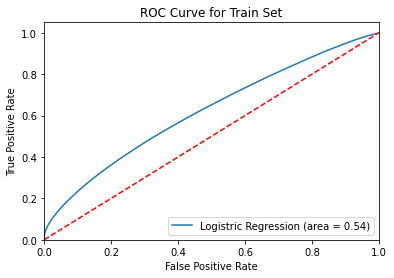

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, lr_model.predict(X_train))

#false positive rate (x-axis), true positive rate(y-axis)
fpr, tpr, thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Train Set')
plt.legend(loc="lower right")

plt.show()

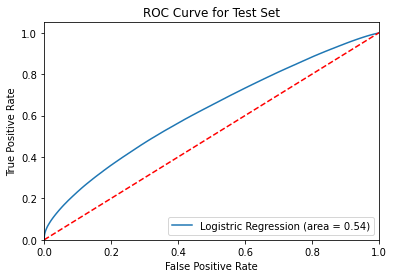

In [ ]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistric Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")

plt.show()

[[2153860   63371]
 [ 858127  107382]]


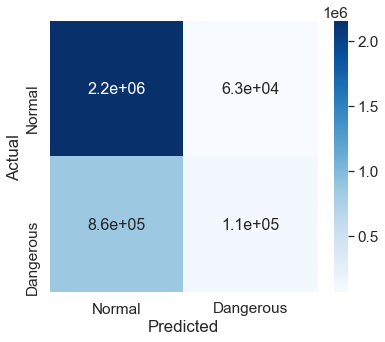

In [ ]:
# visualization of the performance of the algorithm

from sklearn.metrics import confusion_matrix

# evaluate model for test set
class_names_lr=["Normal","Dangerous"]
cm_lr = confusion_matrix(y_test, Y_pred_LR, labels=[0,1])
print(cm_lr)

df_cm_lr = pd.DataFrame(cm_lr, columns=class_names_lr, index = class_names_lr)
df_cm_lr.index.name = 'Actual'
df_cm_lr.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
#for label size
sns.set(font_scale=1.4)
# font size
sns.heatmap(df_cm_lr, cmap="Blues", annot=True,annot_kws={"size": 16})

## Feature Importance